## **Gaussian Discriminant Analysis - ML Exercise 3 - Kavish and Florian**

In [201]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import imageio

In [0]:
!git clone https://github.com/KavishBhatia/MachineLearning.git

Cloning into 'MachineLearning'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 134 (delta 21), reused 0 (delta 0), pack-reused 87
Receiving objects: 100% (134/134), 590.92 KiB | 17.38 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [0]:
image = Image.open("MachineLearning/negatives/n01.png")


Compute the feature probability distributions for the positive(p) and negative(n) group.
Features:
    1. Mean of all (R)GB values
    2. Mean of all R(G)B values
    3. Mean of all RG(B) values
    4. Highest cumulative RBG value of 2x2 Filter 
    
Plot distributions for p and n and check if they are differentiable.

Sum up relative probability for an image to be in p or n according to all feature probabilities.


In [202]:
category = ["positives", "negatives"]
# ml = "MachineLearning/"

def getPositiveImages():
  image_path = []
  for i in range(1,31):
    if i < 10:
      img_name = "/p0" + str(i)
    else:
      img_name = "/p" +str(i)    
    path = category[0] + img_name + ".png"
    image_path.append(path)
  return image_path  

def getNegativeImages():
  image_path = []
  for i in range(1,31):
    if i < 10:
      img_name = "/n0" + str(i)
    else:
      img_name = "/n" +str(i)    
    path = category[1] + img_name + ".png"
    image_path.append(path)
  return image_path
  
  

In [203]:
  picturePathListPositive = getPositiveImages()
  picturePathListNegative = getNegativeImages()

In [204]:
def getPixelValues(imagepath):
  im = imageio.imread(imagepath)
  return im

In [205]:
def computeMeanForAllColours(imagepath):
  pixValues = getPixelValues(imagepath)
  meanPixValues = np.mean(pixValues)
  return meanPixValues

def computeMeanSingleColour(colour, imagepath):
  pixValues = getPixelValues(imagepath)
  meanPixValues = np.mean(pixValues[:,:,colour])
  return meanPixValues

In [206]:
red = 0
green = 1
blue = 2
m = 60 # total number of pos and neg images
n = 2 #no of features

In [208]:
def meanAllValues():
  
  listOfPosMeans = []
  listOfNegMeans = []
  listOfPosRedMeans = [] # pos red means
  listOfPosGreenMeans = [] # pos green means
  listOfPosBlueMeans = [] # pos blue means
  listOfNegRedMeans = [] # neg red means
  listOfNegGreenMeans = [] # neg green means
  listOfNegBlueMeans = [] # neg blue means
  listOfPosFilterMeans = [] # Filter means
  listOfNegFilterMeans = [] # Filter means
  
  for i in picturePathListPositive:
    listOfPosMeans.append(computeMeanForAllColours(i))
    listOfPosRedMeans.append(computeMeanSingleColour(red,i))
    listOfPosGreenMeans.append(computeMeanSingleColour(green,i))
    listOfPosBlueMeans.append(computeMeanSingleColour(blue,i))
    listOfPosFilterMeans.append(filterMaxMean(i))
   
  for i in picturePathListNegative:
    listOfNegMeans.append(computeMeanForAllColours(i))
    listOfNegRedMeans.append(computeMeanSingleColour(red,i))
    listOfNegGreenMeans.append(computeMeanSingleColour(green,i))
    listOfNegBlueMeans.append(computeMeanSingleColour(blue,i))
    listOfNegFilterMeans.append(filterMaxMean(i))
    
  bins = np.linspace(100, 200, 25)
  plt.hist(listOfPosMeans, bins, alpha=0.5, label='positive')
  plt.hist(listOfNegMeans, bins, alpha=0.5, label='negative')
  plt.legend()
  plt.show()

  bins = np.linspace(100, 200, 25)
  plt.hist(listOfPosRedMeans, bins, alpha=0.5, label='positive red')
  plt.hist(listOfNegRedMeans, bins, alpha=0.5, label='negative red')
  plt.legend()
  plt.show()
    
  bins = np.linspace(100, 200, 25)
  plt.hist(listOfPosGreenMeans, bins, alpha=0.5, label='positive green')
  plt.hist(listOfNegGreenMeans, bins, alpha=0.5, label='negative green')
  plt.legend()
  plt.show()

  bins = np.linspace(100, 200, 25)
  plt.hist(listOfPosBlueMeans, bins, alpha=0.5, label='positive blue')
  plt.hist(listOfNegBlueMeans, bins, alpha=0.5, label='negative blue')
  plt.legend()
  plt.show()
  
  bins = np.linspace(100, 200, 25)
  plt.hist(listOfPosFilterMeans, bins, alpha=0.5, label='positive filter')
  plt.hist(listOfNegFilterMeans, bins, alpha=0.5, label='negative filter')
  plt.legend()
  plt.show()

In [209]:
def filterMaxMean(image):
  img = Image.open(image)
  members = [(0,0)] * 4
  filteredMeanMax = 255
  for i in range(1,23):
    for j in range(1,23):
        members[0] = img.getpixel((i-1,j-1))
        members[1] = img.getpixel((i-1,j))
        members[2] = img.getpixel((i-1,j+1))
        members[3] = img.getpixel((i,j-1))
        tempFilteredMeanMax = np.mean(members)
        if tempFilteredMeanMax < filteredMeanMax:
          filteredMeanMax = tempFilteredMeanMax
  return (filteredMeanMax - 255)*(-1)


In [0]:
filterMaxMean("MachineLearning/negatives/n01.png")

143.08333333333331

In [0]:
filterMaxMean("MachineLearning/positives/p01.png")

142.58333333333331

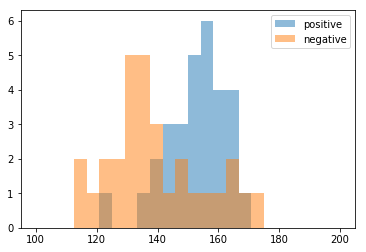

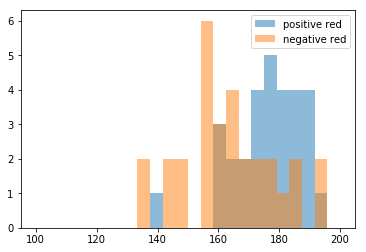

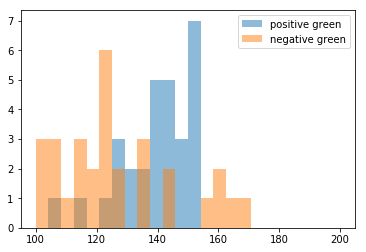

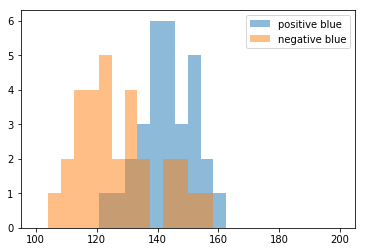

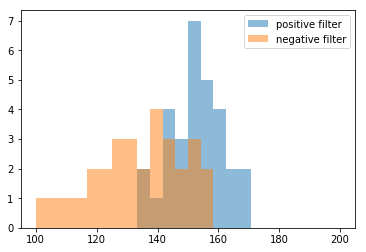

In [0]:
meanAllValues()

All Features except for mean green pixel values seem to allow for decent destinction between the classes. G

In [210]:
def getFeaturesOneImage(imagepath):
    X = []
    X.append(filterMaxMean(imagepath))
#     X.append(computeMeanForAllColours(imagepath))
#     X.append(computeMeanSingleColour(red, imagepath))
    X.append(computeMeanSingleColour(blue, imagepath))
    X = np.asarray(X).reshape(1,n)
    return X

In [211]:
def computeParameters():
    flag = 0
    meanMaxPos = []
    meanMaxNeg = []
    meanAllColorNeg = []
    meanAllColorPos = []
    meanRedNeg = []
    meanRedPos = []
    meanBlueNeg = []
    meanBluePos = []
    mu0 = []
    mu1 = []
    sig = []
    
    for i in range(60):
        if i >= 30:
            flag = 1
        if flag == 0:
            meanMaxNeg.append(filterMaxMean(picturePathListNegative[i]))
#             meanAllColorNeg.append(computeMeanForAllColours(picturePathListNegative[i]))
#             meanRedNeg.append(computeMeanSingleColour(red, picturePathListNegative[i]))
            meanBlueNeg.append(computeMeanSingleColour(blue, picturePathListNegative[i]))
        elif flag == 1:
            i = i - 30
            meanMaxPos.append(filterMaxMean(picturePathListPositive[i]))
#             meanAllColorPos.append(computeMeanForAllColours(picturePathListPositive[i]))
#             meanRedPos.append(computeMeanSingleColour(red, picturePathListPositive[i]))
            meanBluePos.append(computeMeanSingleColour(blue, picturePathListPositive[i]))
    
    mu0.append(np.mean(meanMaxNeg))
#     mu0.append(np.mean(meanAllColorNeg))
#     mu0.append(np.mean(meanRedNeg))
    mu0.append(np.mean(meanBlueNeg))
    
    mu1.append(np.mean(meanMaxPos))
#     mu1.append(np.mean(meanAllColorPos))
#     mu1.append(np.mean(meanRedPos))
    mu1.append(np.mean(meanBluePos))
    
    mu0 = np.asarray(mu0).reshape(1,n)
    mu1 = np.asarray(mu1).reshape(1,n)
    
    SIG = np.zeros((n,n)) #dimensions
    for i in picturePathListNegative:
        X = getFeaturesOneImage(i)
        X = np.asarray(X).reshape(1,n)
        sub = np.subtract(X,mu0)
        SIG += np.dot(sub.T,sub)
    
    for i in picturePathListPositive:
        X = getFeaturesOneImage(i)
        X = np.asarray(X).reshape(1,n)
        sub = np.subtract(X,mu1)
        SIG += np.dot(sub.T,sub)
    
    #print(SIG*(1/m))
    return mu0,mu1,SIG*(1/m)
    

In [218]:
def gda():
  negVecMean, posVecMean, sigma = computeParameters()
  phi=0.5
  dimensions = n #number of features
  
  picturePathList = []
  picturePathList = picturePathListNegative + picturePathListPositive
  
  classifiedList = []
   
  denominator = (2 * np.pi)**(dimensions/2) * np.sqrt(np.linalg.det(sigma))
  
  for i in picturePathList:
    vecImg = []
    vecImg = getFeaturesOneImage(i)
    vector = vecImg - negVecMean
    
    probClass0 = np.exp(-0.5 * (vecImg - negVecMean) @ (np.linalg.inv(sigma) @ (vecImg - negVecMean).T)) / denominator
    probClass1 = np.exp(-0.5 * (vecImg - posVecMean) @ (np.linalg.inv(sigma) @ (vecImg - posVecMean).T)) / denominator
    

    if probClass0 > probClass1:
      classifiedList.append('0')
    else:
      classifiedList.append('1')
  
  
  return classifiedList

In [217]:
classifierList = gda()
classifierList

['0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1']